# World Happiness

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [8]:
data = pd.read_csv('happiness score.csv')

In [9]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

In [11]:
data=data[data_columns].copy()

In [19]:
happy_df = data.rename({'Country':'country_name', 'Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'GDP_per_capita','Family':'family','Health (Life Expectancy)':'healthy_life_expectancy','Freedom':'freedom','Trust (Government Corruption)':'trust_government_corruption','Generosity':'generosity'}, axis =1)

In [20]:
happy_df.head()

,country_name,region,happiness_score,GDP_per_capita,family,healthy_life_expectancy,freedom,trust_government_corruption,generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [21]:
happy_df.isnull().sum()

country_name                   0
region                         0
happiness_score                0
GDP_per_capita                 0
family                         0
healthy_life_expectancy        0
freedom                        0
trust_government_corruption    0
generosity                     0
dtype: int64

Text(0, 0.5, 'GDP per Capita')

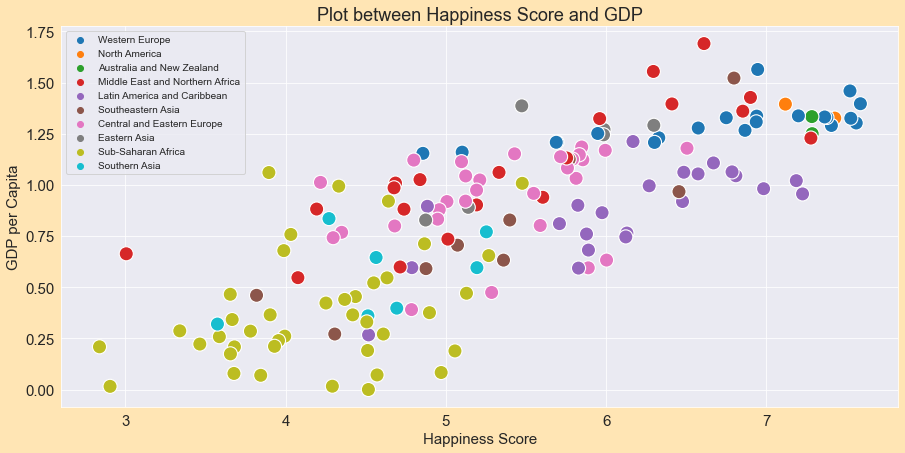

In [23]:
#Plot b/w happiness and GDP
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.GDP_per_capita, hue = happy_df.region, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [24]:
gdp_region = happy_df.groupby('region')['GDP_per_capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

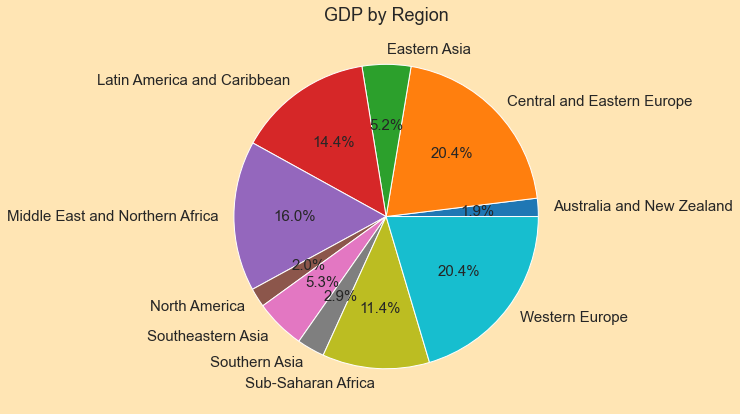

In [25]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [26]:
# Total countries
total_country = happy_df.groupby('region')[['country_name']].count()
print(total_country)

                                 country_name
region                                       
Australia and New Zealand                   2
Central and Eastern Europe                 29
Eastern Asia                                6
Latin America and Caribbean                22
Middle East and Northern Africa            20
North America                               2
Southeastern Asia                           9
Southern Asia                               7
Sub-Saharan Africa                         40
Western Europe                             21


C:\Users\Hi\AppData\Local\Temp\ipykernel_4308\4243625742.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

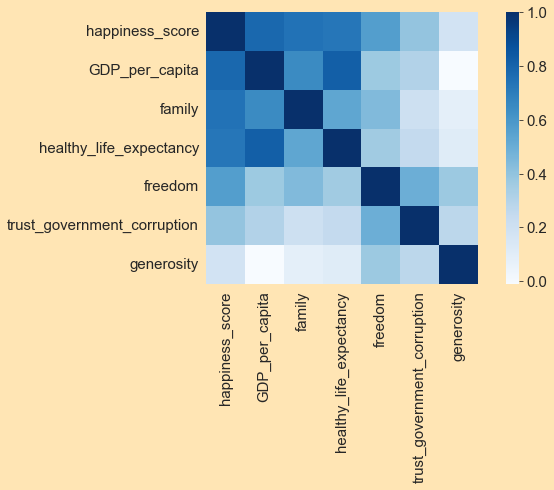

In [27]:
# Correlation Map
cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
           cmap="Blues", square=True, ax=ax)

In [28]:
#corruption in regions
corruption = happy_df.groupby('region')[['trust_government_corruption']].mean()
corruption

,trust_government_corruption
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

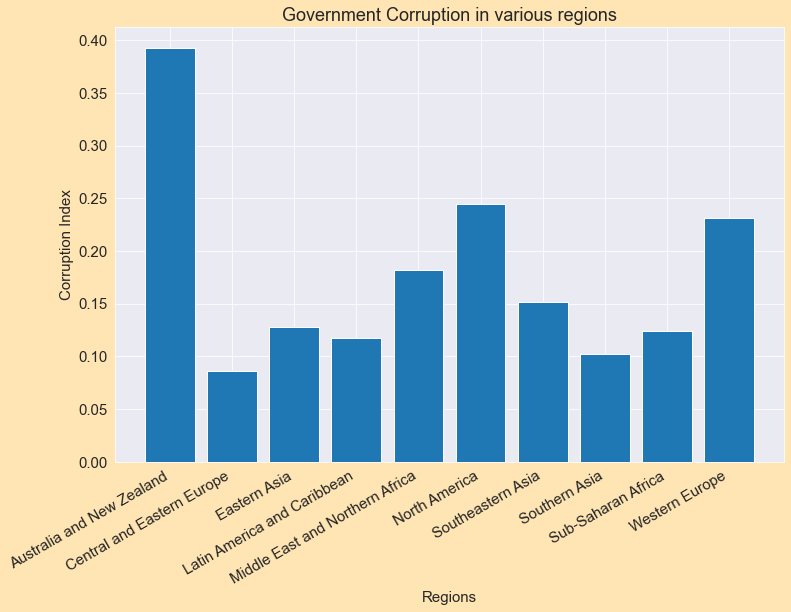

In [29]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Government Corruption in various regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.trust_government_corruption)

In [30]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\Hi\AppData\Local\Temp\ipykernel_4308\1906001808.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')


Text(112.125, 0.5, 'Life expectancy')

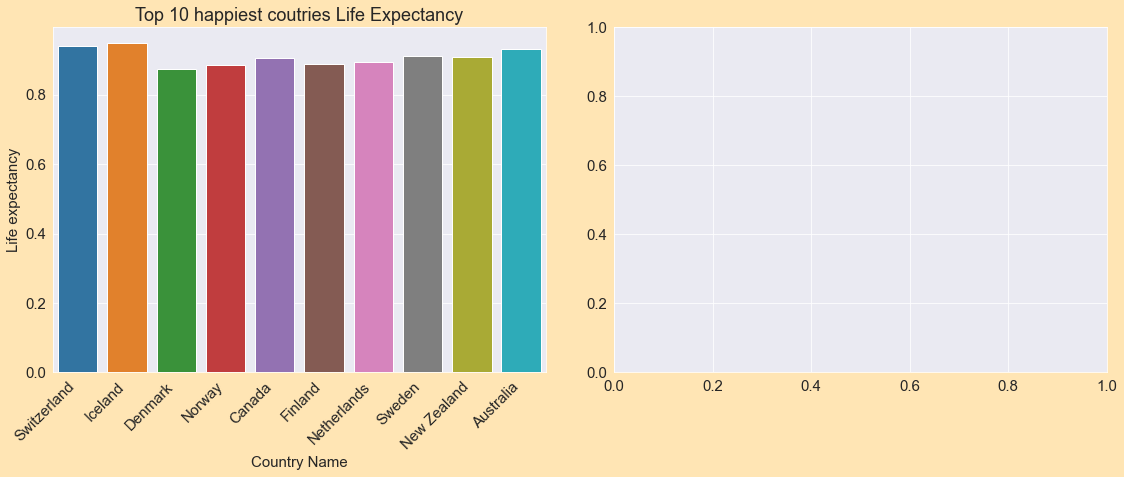

In [32]:
fig, axes=plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('Top 10 happiest coutries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy, ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

C:\Users\Hi\AppData\Local\Temp\ipykernel_4308\3284848099.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')


Text(112.125, 0.5, 'Life expectancy')

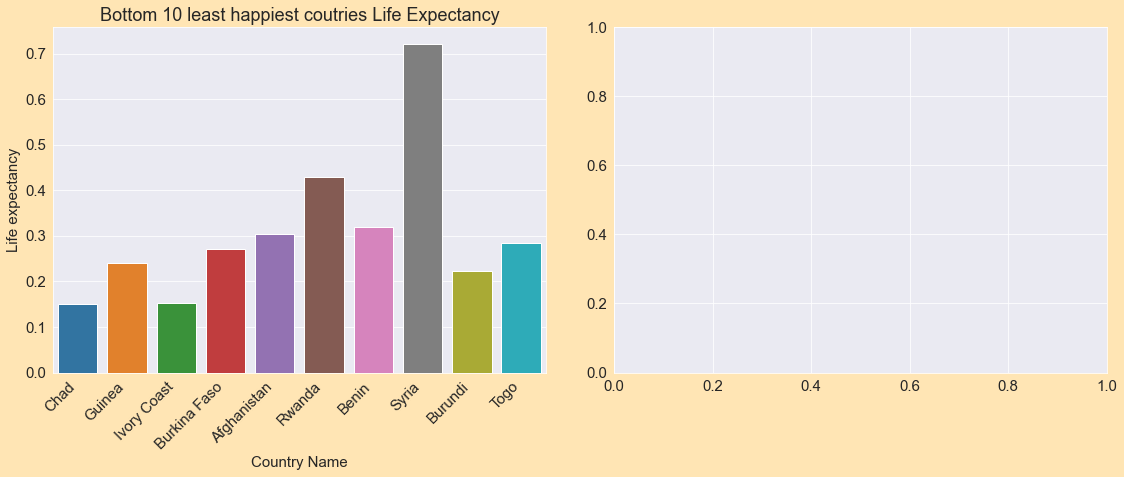

In [34]:
fig, axes=plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad=2)
xlabels=bottom_10.country_name
axes[0].set_title('Bottom 10 least happiest coutries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy, ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness Score')

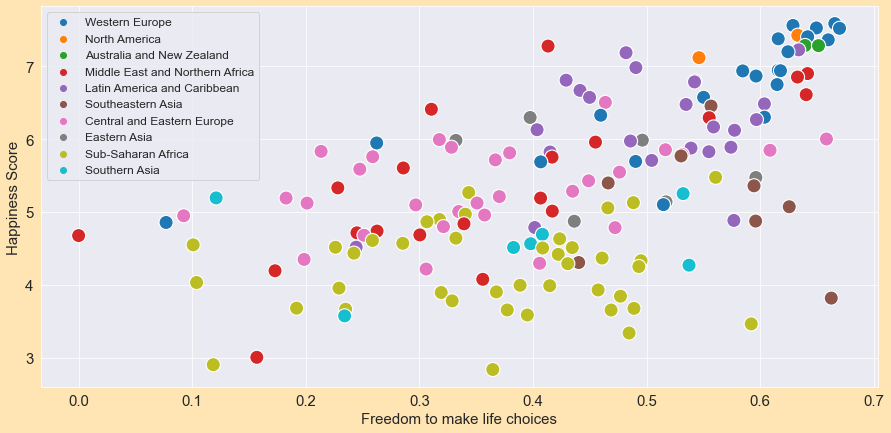

In [37]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom, y=happy_df.happiness_score, hue=happy_df.region, s=200);
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

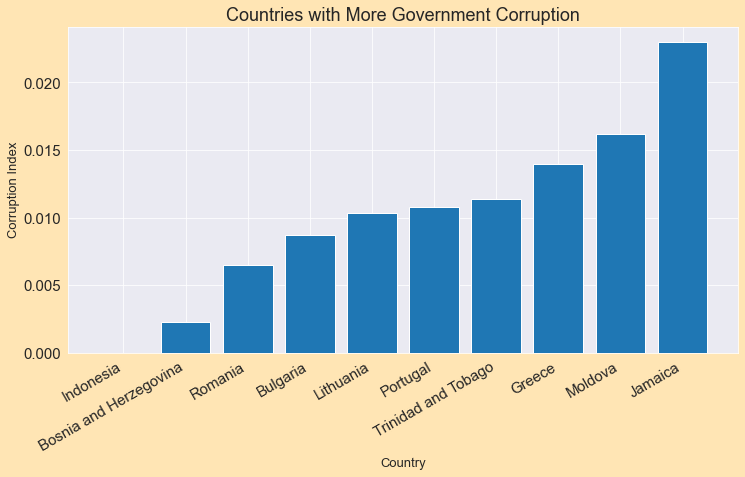

In [38]:
country = happy_df.sort_values(by='trust_government_corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with More Government Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name,country.trust_government_corruption)

<BarContainer object of 10 artists>

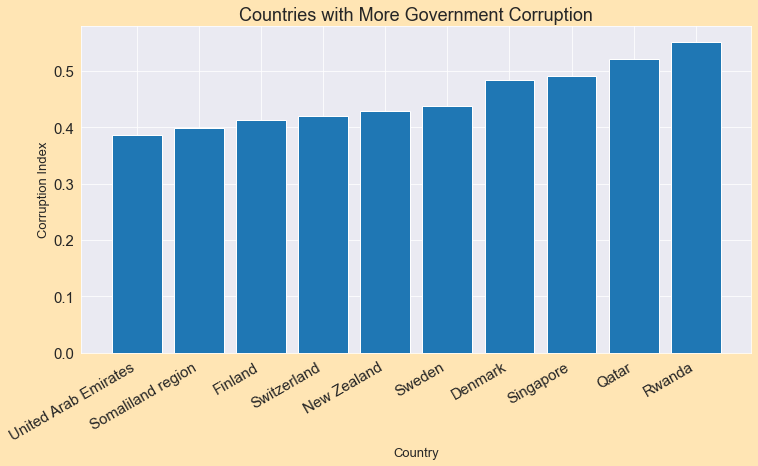

In [39]:
country = happy_df.sort_values(by='trust_government_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with More Government Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name,country.trust_government_corruption)

Text(0, 0.5, 'Corruption')

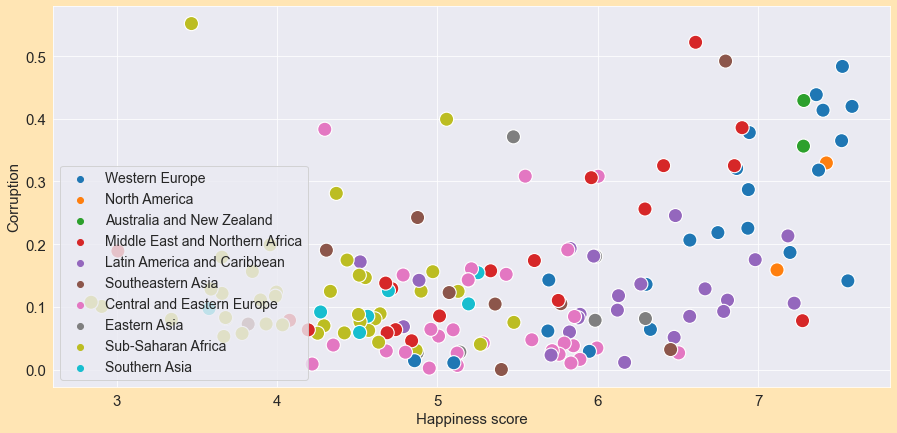

In [41]:
#Corruption vs Happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.trust_government_corruption,hue=happy_df.region, s=200);
plt.legend(loc='lower left', fontsize = '14')
plt.xlabel('Happiness score')
plt.ylabel('Corruption')

Text(0, 0.5, 'Happiness score')

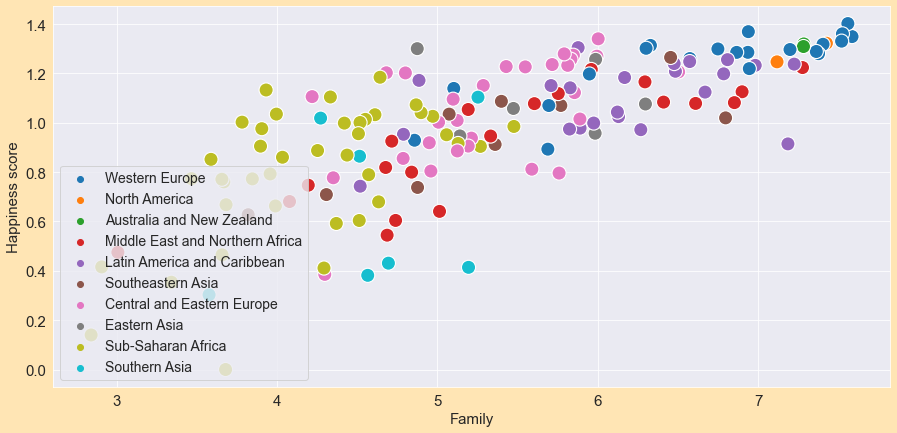

In [43]:
#Family vs Happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.family,hue=happy_df.region, s=200);
plt.legend(loc='lower left', fontsize = '14')
plt.xlabel('Family')
plt.ylabel('Happiness score')

Text(0, 0.5, 'Happiness score')

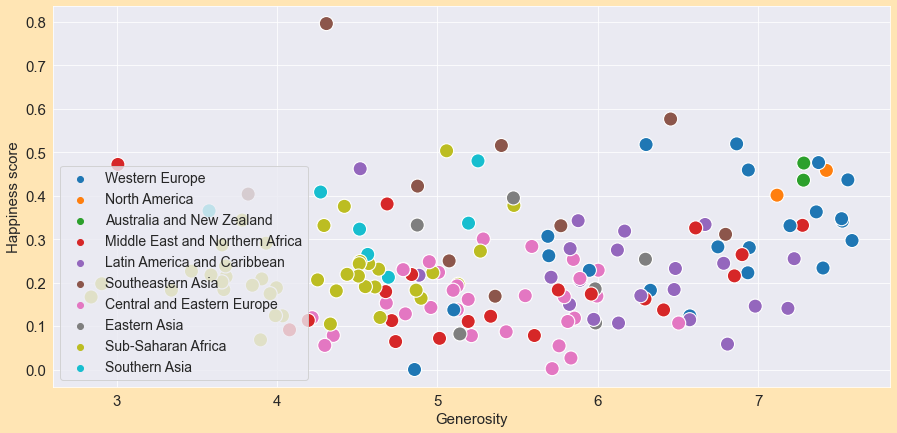

In [44]:
#Generosity vs Happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.generosity,hue=happy_df.region, s=200);
plt.legend(loc='lower left', fontsize = '14')
plt.xlabel('Generosity')
plt.ylabel('Happiness score')

# Titanic Project

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
titanic = pd.read_csv('Titanic Survived Project.csv')

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#count the number of rows and columns
titanic.shape

(891, 12)

In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#Count of number of survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

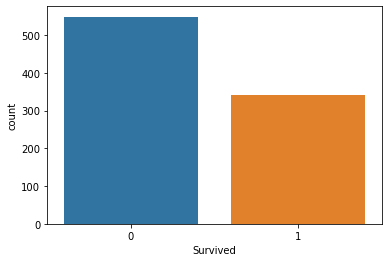

In [27]:
#visualize the count of survivors
sns.countplot(titanic['Survived'])

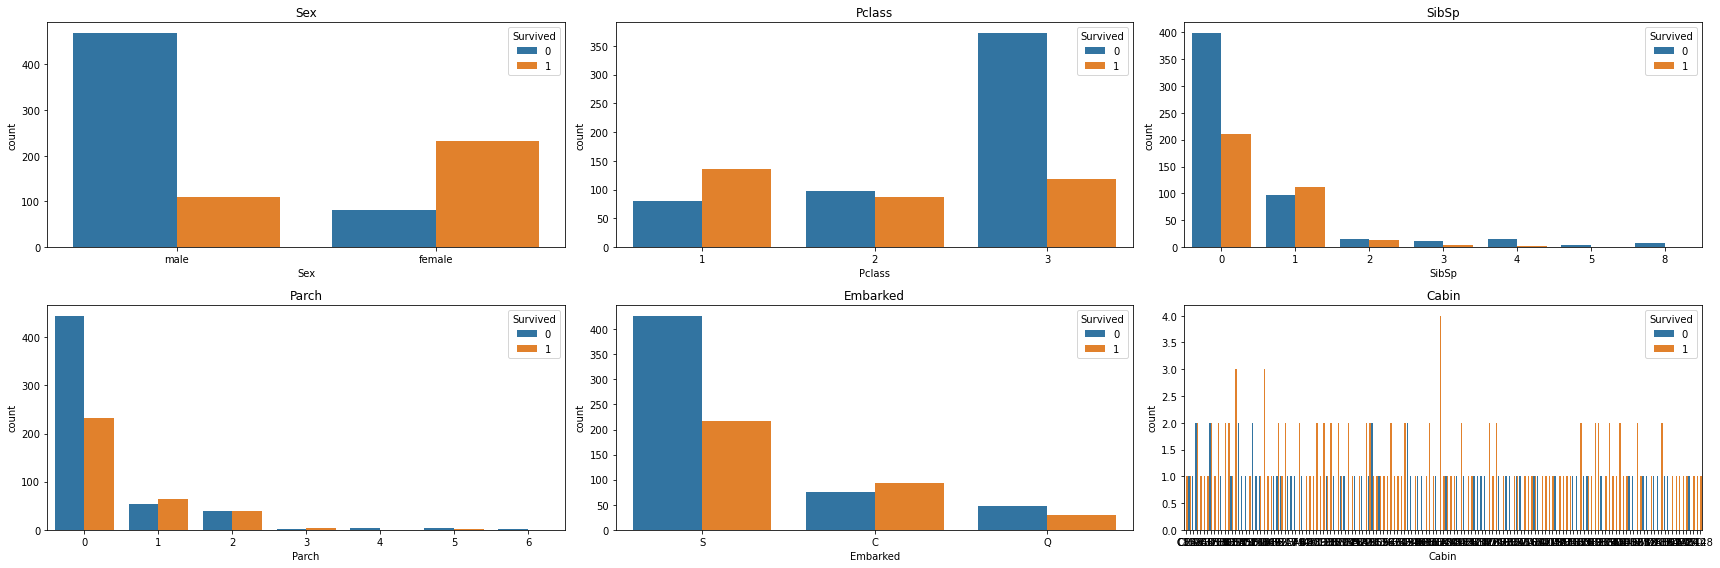

In [35]:
# Visualize the count of survivors for columns 'Name', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked','Cabin']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i = r*n_cols + c #index to go through the number of columns
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()

In [37]:
#Look at survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [38]:
#Look at survival rate by sex and class
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

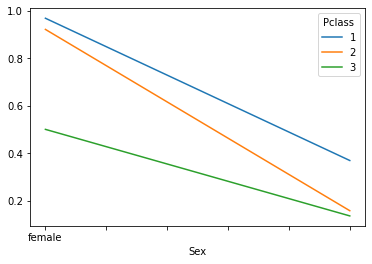

In [39]:
#Look at survival rate by sex and class visually
titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

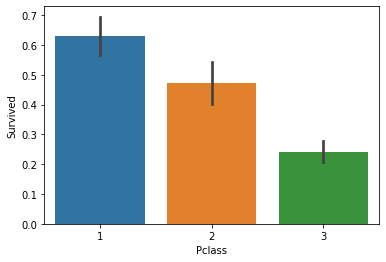

In [40]:
#Plot the survival rate of each class.
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [41]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

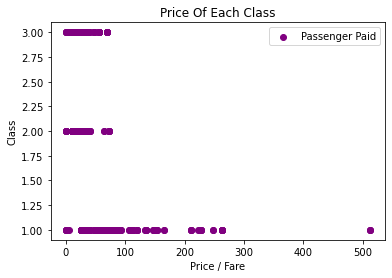

In [43]:
#Plot the Prices Paid Of Each Class
plt.scatter(titanic['Fare'], titanic['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [44]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
#Look at all of the values in each column & get a count 
for val in titanic:
   print(titanic[val].value_counts())
   print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88,

In [46]:
# Drop the columns
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['Embarked', 'Age'])

In [47]:
#count the new number of rows and columns
titanic.shape

(712, 8)

In [48]:
#Lets check the data types
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [50]:
#Print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)

#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [52]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values

In [53]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [54]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [56]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [58]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
print(cm)
print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



In [59]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


<AxesSubplot:xlabel='feature'>

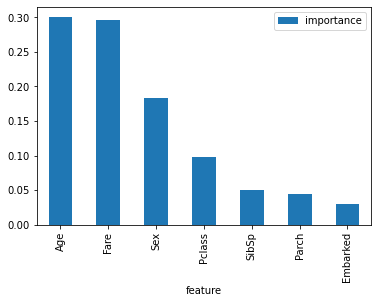

In [60]:
#Visualize the importance
importances.plot.bar()

In [61]:

#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [63]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didnot make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didnot make it
